### Project 4
### Movie Review Classifier - Valerie Briot

Using the movie review document classifier discussed in this chapter, generate a list of the 30 features that the classifier finds to be most informative. Can you explain why these particular features are informative? Do you find any of them surprising?

***

For we will build the classifier in question.

***

The Movie Reviews Corpus, which categorizes each review as positive or negative.

In [34]:
# Import from required package

import nltk
from nltk.corpus import movie_reviews

import random

import pandas as pd

import matplotlib.pyplot as plt

# inline matplotlib
%matplotlib inline

First, we construct a list of documents, labeled with the appropriate categories.

In [29]:
documents = [( list( movie_reviews.words( fileid)), category) 
    for category in movie_reviews.categories()
        for fileid in movie_reviews.fileids( category)] 

We will now shuffle the document to ensure randomization but we will set a seed for reproducible results.  

In [15]:
# Use Seed to be able to re-produce results
random_seed=123468
random.seed(random_seed)
random.shuffle( documents) 

Let us now consider the different words in the overall corpus and their frequency of appearance.  We will convert all words to lower cases.  

In [16]:
all_words = nltk.FreqDist( w.lower() for w in movie_reviews.words())

Before building the feature, we will look at some numbers for the overall corpus. 

There are 2000 documents in the movie reviews dataset.
There are 39768 distinct words in the dataset.
There are 1583820 tokens in the dataset.
    ,   the     .     a   and    of    to     '    is    in     s     "    it  that     -     )     (    as  with   for 
77717 76529 65876 38106 35576 34123 31937 30585 25195 21822 18513 17612 16107 15924 15595 11781 11664 11378 10792  9961 


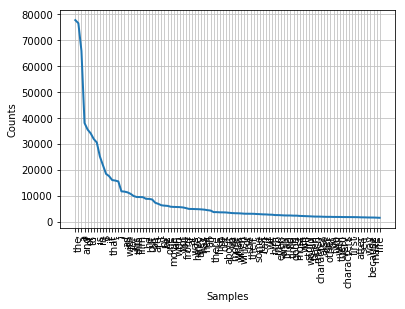

In [35]:
print("There are %d documents in the movie reviews dataset." % (len(documents)))
print("There are %d distinct words in the dataset." % (all_words.B()))
print("There are %d tokens in the dataset." % (all_words.N()))
all_words.tabulate(20)
all_words.plot(100)

As could be expected, "stop-words" and punctuation occurs with high frequency.

Next, we define a feature extractor for documents as per the discussion, so the classifier will know which aspects of the data it should pay attention to.  

For document topic identification, we can define a feature for each word, indicating whether the document contains that word. To limit the number of features that the classifier needs to process, we begin by constructing a list of the 2,000 most frequent words in the overall corpus

In [18]:
all_words = nltk.FreqDist( w.lower() for w in movie_reviews.words())

#word_features = all_words.keys()[: 2000]
word_features = [w for (w, c) in all_words.most_common(2000)]

#Build Document Feature
def document_features( document): 
    document_words = set( document) 
    features = {} 
    for word in word_features: 
        features[' contains(% s)' % word] = (word in document_words) 
    return features


We now define a feature extractor that simply checks whether each of these words is present in a given document.  

**Note:**
We compute the set of all words in a document in , rather than just checking if word in document, because checking whether a word occurs in a set is much faster than checking whether it occurs in a list.

Now that we've defined our feature extractor, we can use it to train a classifier to label new movie reviews. To check how reliable the resulting classifier is, we compute its accuracy on the test set. We will use show_most_informative_features() to find out which features the classifier found to be most informative.

In [19]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

Let us look at classifier accuracy:

In [20]:
print("Naive Bayes accuracy with 2000 bag of words features is %s" % (nltk.classify.accuracy(classifier, test_set)))

Naive Bayes accuracy with 2000 bag of words features is 0.77


Let us examin the most informative features. These ratios are known as likelihood ratios, and can be useful for comparing different feature-outcome relationships. We will consider the top 30 informative features.  

In [21]:
classifier.show_most_informative_features(30)

Most Informative Features
   contains(outstanding) = True              pos : neg    =     10.8 : 1.0
         contains(mulan) = True              pos : neg    =      9.2 : 1.0
        contains(seagal) = True              neg : pos    =      8.1 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.8 : 1.0
         contains(damon) = True              pos : neg    =      5.8 : 1.0
        contains(wasted) = True              neg : pos    =      5.5 : 1.0
        contains(poorly) = True              neg : pos    =      5.5 : 1.0
         contains(awful) = True              neg : pos    =      5.4 : 1.0
         contains(waste) = True              neg : pos    =      5.4 : 1.0
    contains(ridiculous) = True              neg : pos    =      5.3 : 1.0
          contains(lame) = True              neg : pos    =      5.3 : 1.0
         contains(flynt) = True              pos : neg    =      5.1 : 1.0
       contains(unfunny) = True              neg : pos    =      5.0 : 1.0

This listing shows that the reviews in the training set that contains the word "outstanding" are 10.8 times more often positive than they are negative, but reviews that contains the word "seagal" are 8.1 times more often positive than they are negative.

Let us examine words that comprise the 30 most informative features;  
* They are not function words but content words (words that convey information in a text)
* Some are Proper names, either of actors or directors 
* Some of these words are part of movie title
 
To facilitate the analysis, we will build a matrix with these words. The matrix comprise of the words that constituted the 30 most informative features, whether the feature was more likely to be negative (-1) or positive (1) and what was the likelyhood ratio (probability). 

In addition, we are building a column whether the name is a proper name and if so, whether the name is part of movie title ("Movie"), a director, filmaker, producer, or actor. If the proper name could not be identified, we denoted it with "Unkown". 

We also build a column to represent a 5 value scale of whether the word invoke for us a positive or negative feeling or neutral as denoted as 0 = neutral, -1=negative, -2=very negative, 1=positive, 2 very positive.

Finally, we used the Standford NLP Sentiment analysis site and record the sentiment for each of our most informative feature. We understand that this site is meant to be a corpus based classifier, this is just to have an alternative to our own very subjective sentiment rating on these features. Standford also has a 5-value scale rating.  

http://nlp.stanford.edu:8080/sentiment/rntnDemo.html  

In [52]:
list_words = ["outstanding", "mulan", "seagal", "wonderfully", "damon", "wasted", "poorly", "awful", \
              "waste", "ridiculous", "lame", "flynt", "unfunny", "worst", "bland", "era", "allows", "stupid", \
             "laughable", "jedi", "fantastic", "memorable", "dull", "pointless", "mess", "portrayal", "hanks", "boring", \
             "terrific", "superb"]
list_pos = [1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1,1]

list_prob = [10.8, 9.2, 8.1, 6.8, 5.8, 5.5, 5.5, 5.4, 5.4, 5.3, 5.3, 5.1, 5.0, 4.5, 4.4, 4.2, 4.2, 4.0, 4.0, 4.0, 3.9, 3.8, \
             3.8, 3.8, 3.8, 3.7, 3.7, 3.7, 3.5, 3.4]

list_proper = ["N", "Y", "Y", "N", "Y", "N", "N", "N", "N", "N", "N", "Y", "N", "N", "N", "N", "N", "N", "N", "Y", "N", \
               "N", "N", "N", "N", "N", "Y", "N", "N", "N"]

list_category = ["none", "movie", "actor", "none", "actor", "none", "none", "none", "none", "none", "none", \
                 "movie", "none", "none", "none", "none", "none", "none", "none", "movie", "none", "none", "none", \
                "none", "none", "none", "actor", "none", "none", "none"]

list_mysentiment = [2, 0, -2, 2, 1, -1, -1, -2, -1, -1, -1, -1, -1, -2, -1, 0, 0, -1, -1, 0, 2, 1, -1, -1, -1, 0, 0, -1, 1, 2]
list_standfordSentiment = [2, 0, 0, 1, 0, -1, -1, 0, -1, -1, -2, 0, -1, -2, -1, 0, 0, -2, -1, 0, 1, 2, -2, -2, -1, 0, 0, -2, 2, 2]

pd_movie = pd.DataFrame(
    {"feature": list_words,
     "pos_neg": list_pos,
     "probability": list_prob, 
     "proper": list_proper, 
     "category": list_category, 
     "mysentiment": list_mysentiment,
     "Stanford": list_standfordSentiment
    })

In [53]:
pd_movie.head(30)

,Stanford,category,feature,mysentiment,pos_neg,probability,proper
0,2,none,outstanding,2,1,10.8,N
1,0,movie,mulan,0,1,9.2,Y
2,0,actor,seagal,-2,-1,8.1,Y
3,1,none,wonderfully,2,1,6.8,N
4,0,actor,damon,1,1,5.8,Y
5,-1,none,wasted,-1,-1,5.5,N
6,-1,none,poorly,-1,-1,5.5,N
7,0,none,awful,-2,-1,5.4,N
8,-1,none,waste,-1,-1,5.4,N
9,-1,none,ridiculous,-1,-1,5.3,N


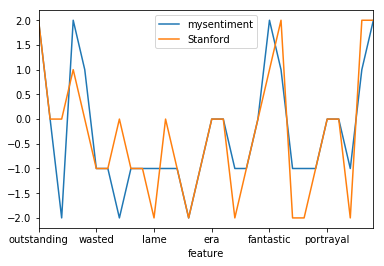

In [54]:
pd_movie.plot(x='feature', y=['mysentiment', 'Stanford'])

In the top 5 most informative features, we have 3 proper names, 2 pertaining to actors and one to a movie.  These features may be accurate to classify the movie review but they are of use only of they appears in the movie review.  Hence, for feature the is a movie title as in the case of "mulan" this has very limited use to classify any other movie reviews unless it is to compare another movie with this one.  For actors, such as "seagal" or "damon", these features would only be relevant if the movie being reviewed has them as actors.  Again this would have limited used for a general movie review classifier.  Although in the case of "seagal" it appears to be a strong negative indicator (sentiment that I fully share).  
For the non-proper word, it is important to remark again that the one that represent the stronger features are content words. Meaning that they carry information or/and meaning. Actually one could assume that the stronger the intensity of the meaning, the most relevant as a feature it would happen to be.  In interesting avenue of research beyone the scope of this protect would be to analyse such possibility. The difficulty would be in evaluating and ranking the intensity in an objective manner.  For example, "wonderfully" has a stronger conotation for myself than for the Standford Sentiment analysis engine.

I find surprising that words such as "superb" or "terrific" that are positive and have a fairly strong meaning are not highly ranked as most informative features, only 3.5 and 3.4 (positive), meaning that these words are 3.5 and 3.4 times more positive then negative.  I would have expected a much higher probability towards positive.  Similarly, a word such as "boring" has a ranking of 3.7 (negative). Hence review containing this word are 3.7 more times negative than positive. Again, I would have expected a much higher probability towards negative. 